Here's the basic model architecture to classify MNIST or fashion-MNIST, it should look pretty familiar by now. When specifying the dense layer of neurons, I can specify the number as well as an activation function, which you can see here is defined by name and in this case it's ReLU. When using our simple dense layer, we didn't have the facility to specify ReLU, but a workaround was to implement our own ReLU function and activate it using a lambda layer.
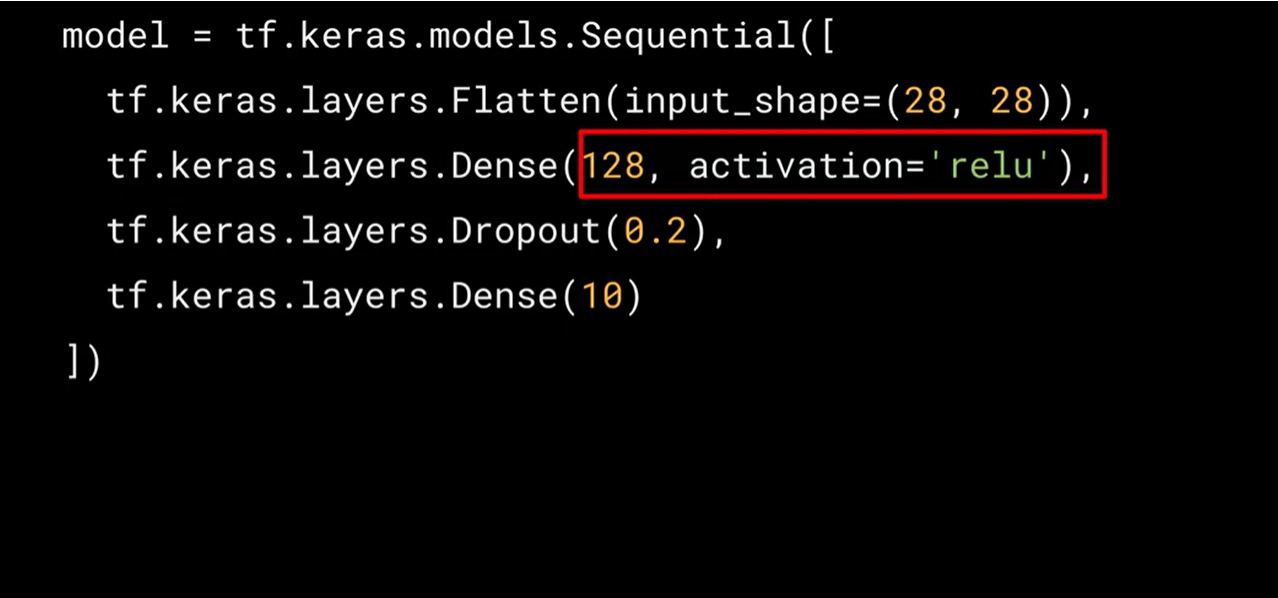

When using our simple dense layer, we didn't have the facility to specify ReLU, but a workaround was to implement our own ReLU function and activate it using a lambda layer. his worked pretty well, but it's a bit hacky. 
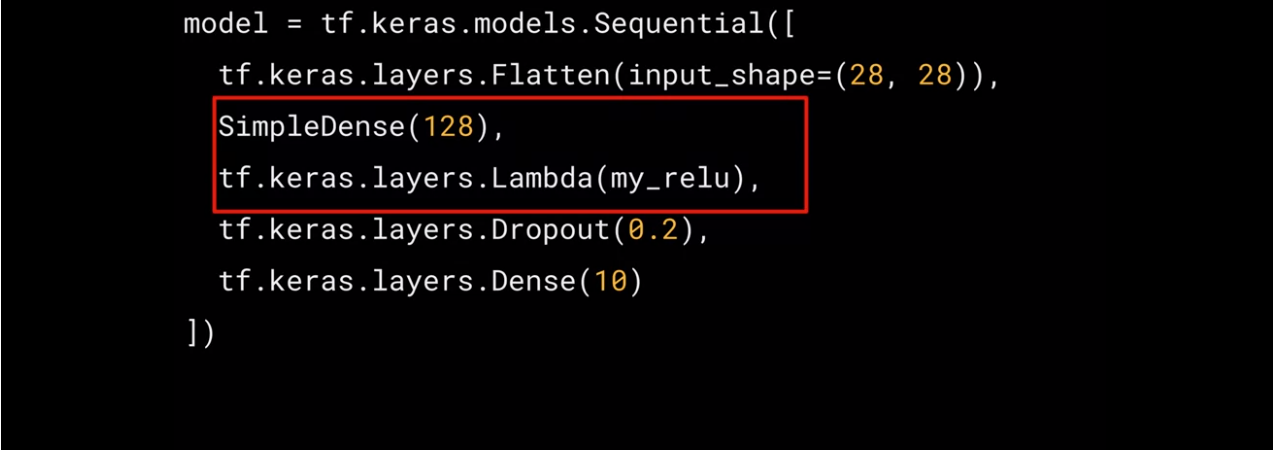

In order to see how to implement an activation, let's do a quick recap of our simple dense. It's a pretty compact piece of code that has init, build and call methods. It's the job of the init method to do the initial setup of the layer, including managing the inheritance from the layer base class. If we're going to use an activation function, we'll have to set that up here.
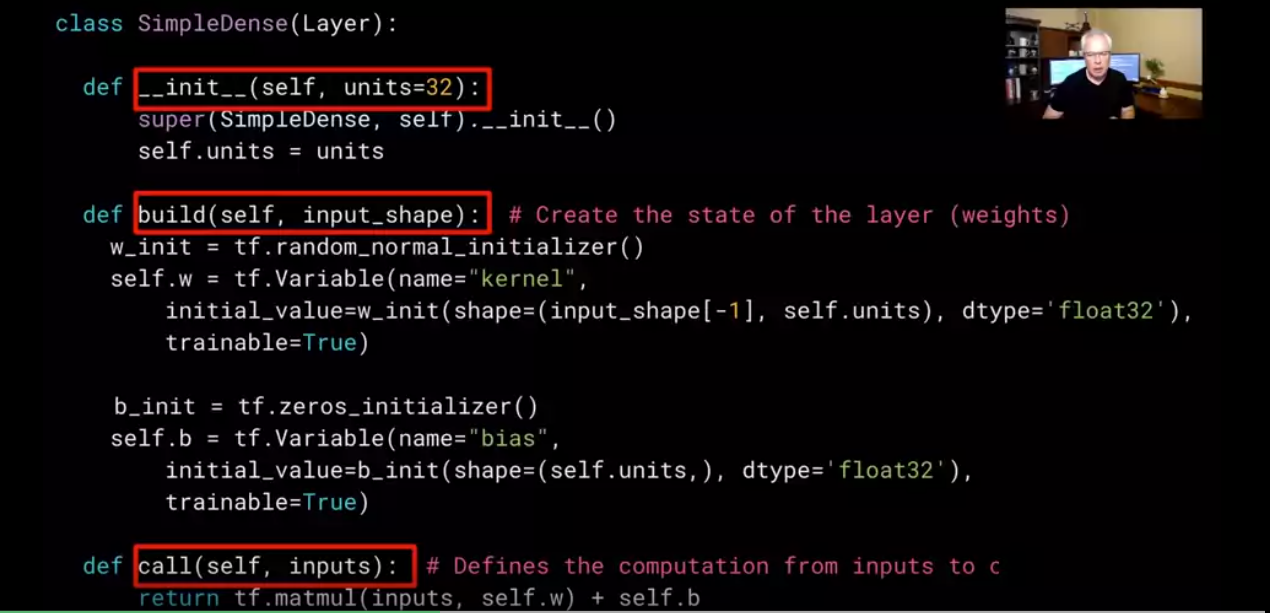

(NOTE: here the build function is ommitted for the presentation purpose only.)In the init function, we have to specify that we'll accept an activation function. The activation function can either be a string containing the name of the function or an instance of an activation object. We can default it to none so that if we don't receive the parameter, we won't use any activation function at all. Then we can set our self dot activation variable to be the value of t_f dot Keras dot activations dot get, with this activation name. This will set self dot activation to be an instance of the named activation function. For example, if we pass ReLU as the activation, Keras will give us a ReLU function as self dot activation. Remember, you can pass either a string naming the activation function or an object instance of one. If you pass something invalid, your code will fail at this line. Then in call, as you might be familiar with, we calculate the return value on the layer to be the inputs times w plus b. But we now need to activate that. For example, with ReLU, if the value of that is less than zero, we just return zero. Activating is as simple as calling the activation function with the results of the calculation like this and then returning that.
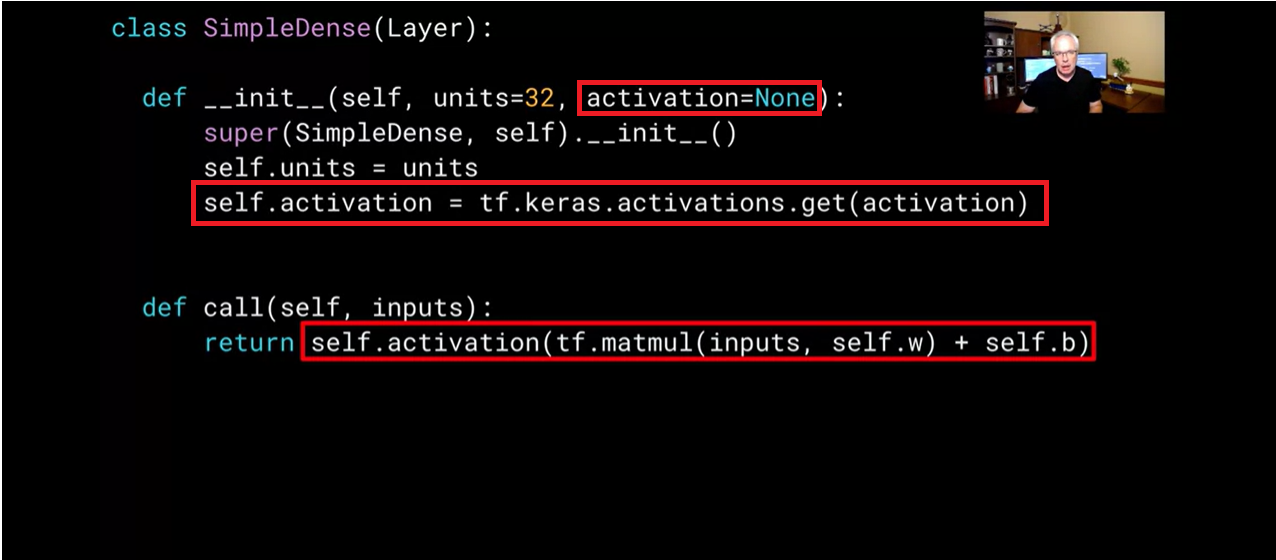

Now let's look back at our model architecture and we can implement our simple dense with a specified activation function like this, where we can see that we've implemented a simple dense layer with 128 neurons, which is activated by the ReLU function.
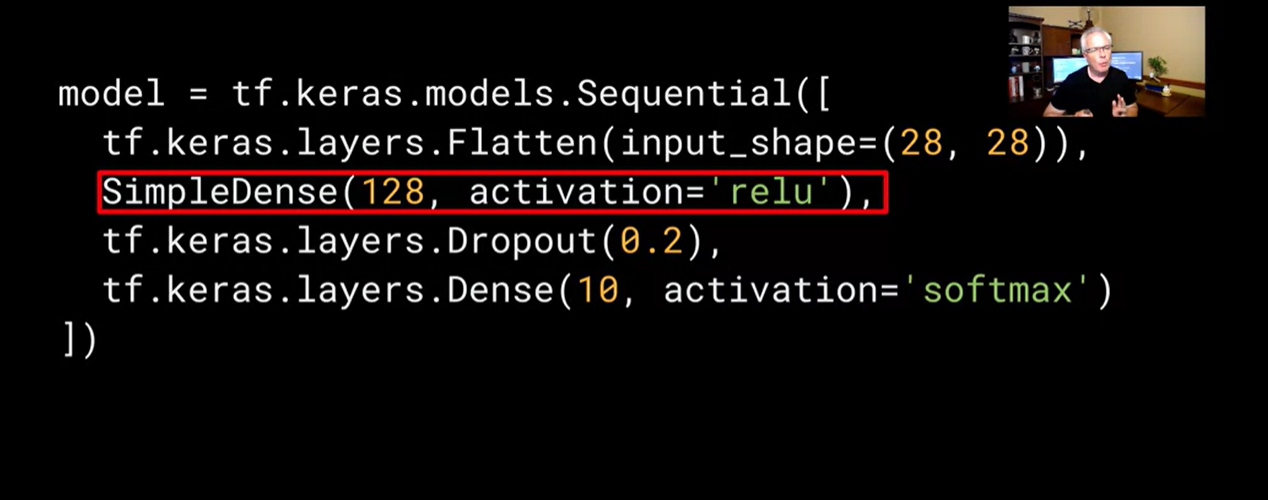

# Ungraded Lab: Activation in Custom Layers

In this lab, we extend our knowledge of building custom layers by adding an activation parameter. The implementation is pretty straightforward as you'll see below.

## Imports

In [1]:
try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

import tensorflow as tf
from tensorflow.keras.layers import Layer

## Adding an activation layer

To use the built-in activations in Keras, we can specify an `activation` parameter in the `__init__()` method of our custom layer class. From there, we can initialize it by using the `tf.keras.activations.get()` method. This takes in a string identifier that corresponds to one of the [available activations](https://keras.io/api/layers/activations/#available-activations) in Keras. Next, you can now pass in the forward computation to this activation in the `call()` method.

In [2]:
class SimpleDense(Layer):

    # add an activation parameter
    def __init__(self, units=32, activation=None):
        super(SimpleDense, self).__init__()
        self.units = units
        
        # define the activation to get from the built-in activation layers in Keras
        self.activation = tf.keras.activations.get(activation)


    def build(self, input_shape):
        w_init = tf.random_normal_initializer()
        self.w = tf.Variable(name="kernel",
            initial_value=w_init(shape=(input_shape[-1], self.units),
                                 dtype='float32'),
            trainable=True)
        b_init = tf.zeros_initializer()
        self.b = tf.Variable(name="bias",
            initial_value=b_init(shape=(self.units,), dtype='float32'),
            trainable=True)
        super().build(input_shape)


    def call(self, inputs):
        
        # pass the computation to the activation layer
        return self.activation(tf.matmul(inputs, self.w) + self.b)

We can now pass in an activation parameter to our custom layer. The string identifier is mostly the same as the function name so 'relu' below will get `tf.keras.activations.relu`.

In [3]:
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    SimpleDense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 78us/sample - loss: 0.2991 - accuracy: 0.9125
Epoch 2/5
60000/60000 [==============================] - 4s 70us/sample - loss: 0.1426 - accuracy: 0.9569
Epoch 3/5
60000/60000 [==============================] - 4s 71us/sample - loss: 0.1071 - accuracy: 0.9671
Epoch 4/5
60000/60000 [==============================] - 4s 71us/sample - loss: 0.0871 - accuracy: 0.9735
Epoch 5/5
10000/10000 [==============================] - 0s 32us/sample - loss: 0.0763 - accuracy: 0.9771


[0.07628412023326382, 0.9771]